# Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

YOUTUBE LINK- https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=20

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

This snippet imports libraries needed for building and analyzing machine learning models in Python, specifically with TensorFlow and Keras, along with data visualization tools. Here’s a breakdown:

1. Importing TensorFlow and Keras
import tensorflow as tf: TensorFlow is a powerful open-source library for deep learning.
from tensorflow import keras: Keras is a high-level API built into TensorFlow for easy construction of neural networks.
These allow you to create and train machine learning models, particularly deep neural networks.

2. Importing Matplotlib for Visualization
import matplotlib.pyplot as plt: Matplotlib is a library for creating static, interactive, and animated visualizations in Python.
%matplotlib inline: This is a Jupyter Notebook-specific command. It ensures that plots are displayed inline, directly below the code cell where they are generated.
3. Importing NumPy for Numerical Operations
import numpy as np: NumPy is a library for handling arrays, matrices, and numerical computations efficiently. It's commonly used for processing data that will be fed into TensorFlow models.# What is TensorFlow?

TensorFlow is a free and open-source library created by Google for building and training machine learning models. It makes it easier to process and analyze data to make predictions or decisions using Artificial Intelligence (AI).

Think of TensorFlow as a toolbox for creating AI systems, especially when working with large amounts of data or tasks like image recognition, language translation, or speech detection.

# Why is TensorFlow Used?

Mathematical Calculations: TensorFlow handles complex math, like matrix operations, which are essential for AI.
Training AI Models: It helps create systems that learn from data.
Large-Scale Operations: TensorFlow is efficient with large datasets, GPUs, and distributed computing.

# How Does TensorFlow Work?

TensorFlow uses tensors, which are like multidimensional arrays (e.g., numbers organized in tables), to represent data. These tensors flow through a "graph" of operations, hence the name TensorFlow.

Simple Example: Predicting a Straight Line
Suppose we want to teach a computer to predict a straight line, 
y=2x+1, using TensorFlow.

Step-by-Step Code:

```python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Create sample data (x values and corresponding y values)
x = np.array([0, 1, 2, 3, 4], dtype=float)  # Input
y = np.array([1, 3, 5, 7, 9], dtype=float)  # Output (y = 2x + 1)

# 2. Build a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # One layer, one neuron
])

# 3. Compile the model (specify how it learns)
model.compile(optimizer='sgd', loss='mean_squared_error')

# 4. Train the model
model.fit(x, y, epochs=100, verbose=0)  # Trains 100 times over the data

# 5. Make a prediction
prediction = model.predict([10])  # Predict for x = 10
print(f"Prediction for x=10: {prediction[0][0]}")

# 6. Plot the line
plt.scatter(x, y, label="True Data")  # Original data
plt.plot(x, model.predict(x), color='red', label="Model's Line")  # Model's line
plt.legend()
plt.show()
```
# What Happens Here?
* Data: We give TensorFlow input-output pairs,x and y
* Model: It creates a neural network with one layer to learn the relationship between x and y 
* Training: TensorFlow adjusts the model until it learns the correct relationship (i.e., y=2x+1).
* Prediction: After training, the model can predict new values, like x=10.
 
# Output:

* Prediction for x=10: The model predicts y≈21, close to the true value y=2(10)+1=21.
* Plot: A red line shows the model's learned relationship, matching the data points.

# What is Keras?

Keras is a high-level library for building and training deep learning models. It runs on top of machine learning frameworks like TensorFlow and makes designing, training, and deploying deep learning models much simpler and more user-friendly.

Think of Keras as the "easy button" for deep learning—while TensorFlow handles the heavy lifting (math and optimizations), Keras lets you write clean, understandable code.

# Why is Keras Used?

Simplicity: Easy-to-use syntax for creating complex models.
Fast Prototyping: Quickly test ideas for neural networks.
Flexibility: Supports different types of deep learning tasks like image recognition, text analysis, and time-series predictions.
Integration: Works seamlessly with TensorFlow, so you get performance and simplicity together.

# How Keras Works

Keras provides building blocks to construct neural networks:

Layers: Units that process data (e.g., Dense, Convolution, LSTM).
Optimizers: Algorithms that help the model learn.
Loss Functions: Metrics to measure the model's accuracy.

# Explanation:

* Model Creation: keras.Sequential builds the neural network in layers.
* Training: The model adjusts its weights to fit the data.
* Prediction: After training, the model can generalize and predict outputs for new inputs (e.g., x=10).

# Output:

* Prediction for x=10: The model predicts y≈21, which matches y=2x+1.
* Plot: The red line (model prediction) fits the original data points.
# Summary:

* Keras is used to simplify deep learning development.
* It abstracts the complexities of TensorFlow while maintaining flexibility and performance.
* With Keras, you can focus more on your ideas and less on the coding details.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Explanation:

This line loads the MNIST dataset using Keras. `MNIST(Modified National Institute of Standards and Technology dataset.)` is a popular dataset of 70,000 grayscale images of handwritten digits (0-9). Each image is 28x28 pixels. The dataset is commonly used for training and testing machine learning models, particularly for image recognition tasks.

What the Code Does:

keras.datasets.mnist:

Provides the MNIST dataset.

load_data():

Splits the dataset into training and testing sets.
Outputs:

* x_train: Training images (60,000 samples of 28x28 pixel arrays).![28x28 pixel image](1_8nWUYV-nIuwL1bGCw3TnEw.png)
* y_train: Labels (corresponding digit for each training image).
* x_test: Testing images (10,000 samples of 28x28 pixel arrays).
* y_test: Labels (corresponding digit for each testing image).


In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
y_train[87]

9

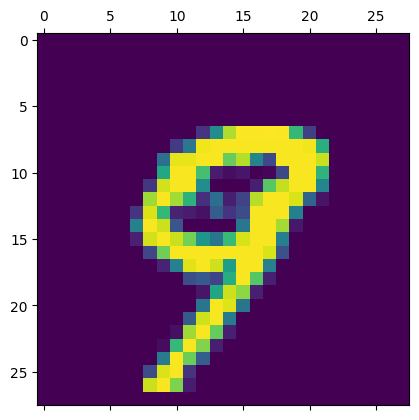

In [9]:
plt.matshow(x_train[87])

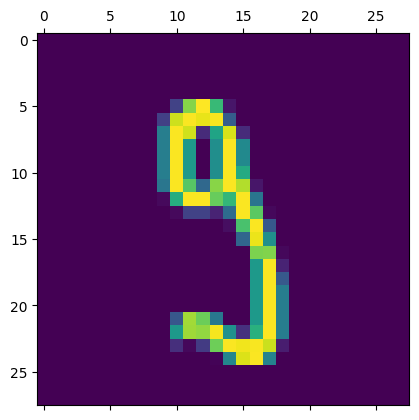

In [10]:
plt.matshow(x_train[48])

In [11]:
x_train[48] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50, 209, 255,
        172,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

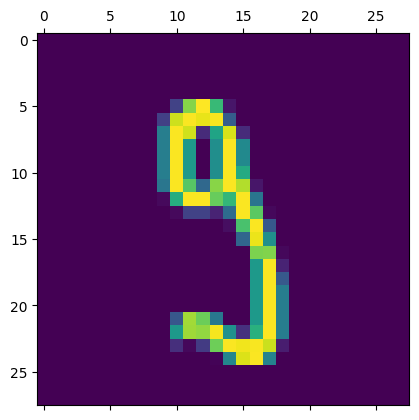

In [12]:
plt.matshow(x_train[48])

In [13]:
y_train[:]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The difference between x_train and y_train lies in their roles and content within the dataset:

1. x_train (Input Data):
* Content: Contains the actual images (features) used for training the model.
* Format: A 3D array of shape (60000, 28, 28):
* 60000: Number of training samples.
* 28x28: Pixel dimensions of each image.
* Purpose: Represents the input to the machine learning model (what the model sees and learns from).

2. y_train (Labels):

* Content: Contains the corresponding labels (target values) for the images in x_train.
* Format: A 1D array of shape (60000,):
* Each value is an integer between 0 and 9, representing the digit in the image.
* Purpose: Represents the correct output (answer) that the model should learn to predict based on the input images.

# Example: 

For a single sample:

* x_train[0]: A 28x28 array of pixel values representing the first image.
* y_train[0]: An integer (e.g., 5) representing the digit in the first image.


# Summary of Differences:

|Feature	|x_train|	y_train|
|-----------|-------|---------|
|Type	|Input data (images)|	Labels (targets)
|Shape|	(60000, 28, 28)|	(60000,)
|Content	|Pixel values of the images	|Digits (0-9) representing labels|
Role	|What the model learns from|What the model tries to predict|

In [14]:
len(x_test)

10000

In [15]:
len(y_test)

10000

In [16]:
len(y_train)

60000

In [17]:
len(x_train)

60000

In [18]:
x_train[0].shape

(28, 28)

In [19]:
y_train[0].shape

()

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

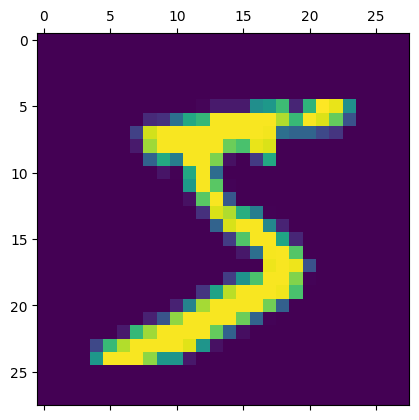

In [21]:
plt.matshow(x_train[0])

In [22]:
X_train_flattened = x_train.reshape(len(x_train), 28*28)
X_test_flattened = x_test.reshape(len(x_test), 28*28)

In [23]:
len(X_train_flattened)

60000

In [24]:
len(X_test_flattened)

10000

WE ARE CONVERTING TWO DIMENSIONAL ARRAY TO ONE DIMENSIONAL ARRAY TO FEED INTO THE NEURAL NETWORK that'ss whyt the shape is converted 28 x 28 to 784

In [25]:
X_test_flattened.shape

(10000, 784)

In [26]:
X_train_flattened.shape

(60000, 784)

In [27]:
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7737 - loss: 17.3304
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8809 - loss: 5.9111
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8853 - loss: 5.4687
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 5.3655
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8871 - loss: 5.2745


![alt text](digits_nn.jpg)

1. What is the goal?

You are creating a neural network using Keras to classify images of handwritten digits (from 0 to 9) from the MNIST dataset. Each image has been flattened into a 1D array of 784 values (28x28 pixels).

2. Code Explanation
Step 1: Define the Model

```python

model = keras.Sequential([ 
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

```

2. What this does:
* keras.Sequential: Creates a simple linear stack of layers for your neural network.
* keras.layers.Dense(10): Adds a dense (fully connected) layer with 10 neurons. Each neuron outputs a * * *   probability score for one of the 10 digits (0–9).
* input_shape=(784,): Specifies the input size. Since each image is flattened into 784 values, this tells the model to expect inputs with 784 features.
* activation='sigmoid': Uses the sigmoid function to calculate the output. Sigmoid squashes values between 0 and 1, useful for probabilities.

Step 2: Compile the Model

```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

```
3. What this does:
* optimizer='adam': Adam is an advanced optimization algorithm that adjusts learning rates during training for better performance.

Think of the **`learning rate`** as the speed at which a machine learning model learns. It's like the size of the steps you take when walking toward a goal.

Example: Imagine you're trying to find the lowest point in a valley while blindfolded. If you take big steps (high learning rate), you might miss the lowest point and keep overshooting. If you take tiny steps (low learning rate), you'll move slowly and it will take a long time to reach the lowest point.

In machine learning, the learning rate controls how much the model's parameters are adjusted with each step. A high learning rate can make the model learn quickly but might miss the best solution. A low learning rate makes the model learn slowly but more accurately.


* loss='sparse_categorical_crossentropy': Measures how far off the model's predictions are from the true labels. It’s used for multi-class classification problems where labels are integers (like 0–9).
* metrics=['accuracy']: Tracks the percentage of correctly classified images during training.

Step 3: Train the Model

```python
model.fit(X_train_flattened, y_train, epochs=5)

```
4. What this does:
* X_train_flattened: The input data (flattened 28x28 images into arrays of size 784).
* y_train: The true labels (digits from 0–9).
* epochs=5: Trains the model for 5 complete passes over the dataset.

uring training:

* The model learns patterns in the data by updating its weights to minimize the loss.
* After each epoch, it calculates the accuracy to see how well it's performing.

# Simple Example Analogy
* Imagine the model is a student learning to recognize digits.
* Input (X): Flattened images are the questions the student tries to answer.
* Output (Y): The correct digit is the answer key the student uses to learn.
* Training: The student adjusts their "knowledge" (weights) to minimize mistakes (loss) using a learning strategy (optimizer).
* Epochs: The student goes through the material (dataset) multiple times to improve.

By the end of training, the student (model) is better at recognizing digits.

#OUTPUT

This output shows the training process of the neural network over 5 epochs. Let’s break it down:

Key Terms

1. Epoch:

* One complete pass through the entire training dataset.
* In this example, the training data is passed through the model 5 times.

2. Steps per Epoch (1875):

* The MNIST dataset contains 60,000 training images.
* If the data is processed in batches of 32 images, there are $$\frac{60,000}{32} = 1875$$ steps per epoch.

3. Loss:

* Measures how far the model's predictions are from the actual labels.
* Lower loss means the model is learning and improving.

4. Accuracy:

* Percentage of correctly classified images.
* Higher accuracy indicates better performance.


# Explanation of the Output
1. Epoch 1/5:

* Time: It took 6 seconds to complete the first epoch (longer because it's the initial training phase).
* Accuracy: 77.75% of the images were classified correctly.
* Loss: 16.6086 (initially high because the model is just starting to learn).

2. Epoch 2/5:

* Accuracy increased to 87.89%.
* Loss decreased significantly to 6.1106, showing the model is learning patterns.

3. Epoch 3/5:

* Accuracy further improved to 88.42%.
* Loss reduced to 5.5770.

4. Epoch 4/5:

* Accuracy stabilized around 88.38%.
* Loss slightly decreased to 5.4647.

5. Epoch 5/5:

* Final accuracy: 88.67%.
* Final loss: 5.3145.

# What Does This Mean?

* **The model is learning over time:** as the number of epochs increases, accuracy improves, and loss decreases.
* **Accuracy Plateaus:** After a few epochs, the improvement slows down, which is normal for a model as it starts reaching its optimal performance.
* **Loss Value:** High loss values indicate that the current network architecture might not be ideal. This is a simple model with only one layer; adding more layers could improve performance.

# Simple Example Analogy

Think of this as a student learning math problems:

* Epoch 1: They start with 77.75% accuracy and make many mistakes (high loss).
* Epoch 2–5: They practice more and get better, but after a point, their performance stabilizes (accuracy plateaus).

To improve further, you might need to give the student (model) more tools (like more layers or different activation functions).

In [30]:
x_train = x_train / 255
x_test = x_test / 255

This code is performing data normalization on the pixel values of the images in the MNIST dataset. Let’s break it down:

# What Does It Do?

* The pixel values in the MNIST dataset range from 0 to 255 (since they are 8-bit grayscale images).
* Dividing each pixel value by 255 scales all the values to a range of 0 to 1.

# Why Normalize?

Better Training Performance:

* Neural networks perform better when the input values are in a smaller, consistent range (e.g., 0 to 1).
* It helps the model converge faster and more accurately during training.

# Avoid Large Values:

* Large input values can lead to unstable gradients in optimization.
* Normalizing keeps the input values small and ensures efficient learning.

Example
Let’s say you have a grayscale image with pixel values:
```css
[ [0,  64, 128],
  [192, 255, 32] ]
```
After normalization (dividing by 255):

```css
[ [0.0, 0.25, 0.50],
  [0.75, 1.0, 0.125] ]
```
* Before: Pixel values ranged from 0 to 255.
* After: Pixel values are scaled to 0.0 to 1.0.

# Effect on Model Training

**If you train without normalization:**

* Large pixel values can make training slow and lead to poor performance.

**If you train with normalization:**

* The model processes inputs more efficiently, learns patterns better, and reaches higher accuracy faster.

By applying X_train = X_train / 255 and X_test = X_test / 255, you ensure the model receives scaled and consistent input data, leading to better training results.


In [31]:
x_train[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
y_train[7]

3

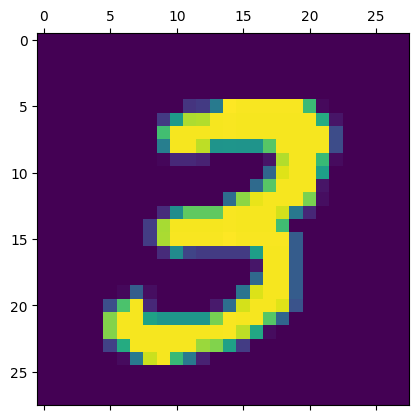

In [33]:
plt.matshow(x_train[7])

In [34]:
X_train_flattened = x_train.reshape(len(x_train), 28*28)
X_test_flattened = x_test.reshape(len(x_test), 28*28)

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8141 - loss: 0.7165
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9121 - loss: 0.3133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9214 - loss: 0.2839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9231 - loss: 0.2758
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9268 - loss: 0.2625


See after scaling we got high accuracy.
So Let's check on test data set which is not trained means for model it is unssen data.

In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.3009


[0.26592618227005005, 0.9261000156402588]

So after evaluating on tset data set(unseen data) also we are getting accuracy as high means the model is good at predating or gussing the numbers  so let us tset how the model will predect the number now

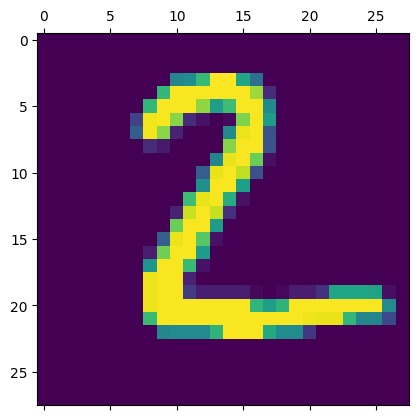

In [37]:
plt.matshow(x_test[1])

In [38]:
a= model.predict(X_test_flattened)
a[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([3.3389920e-01, 6.9137281e-03, 9.9924177e-01, 5.1845956e-01,
       5.2930460e-10, 8.3444667e-01, 9.1390729e-01, 1.3200652e-12,
       1.5669954e-01, 4.3660844e-09], dtype=float32)

# The above output are predication scores

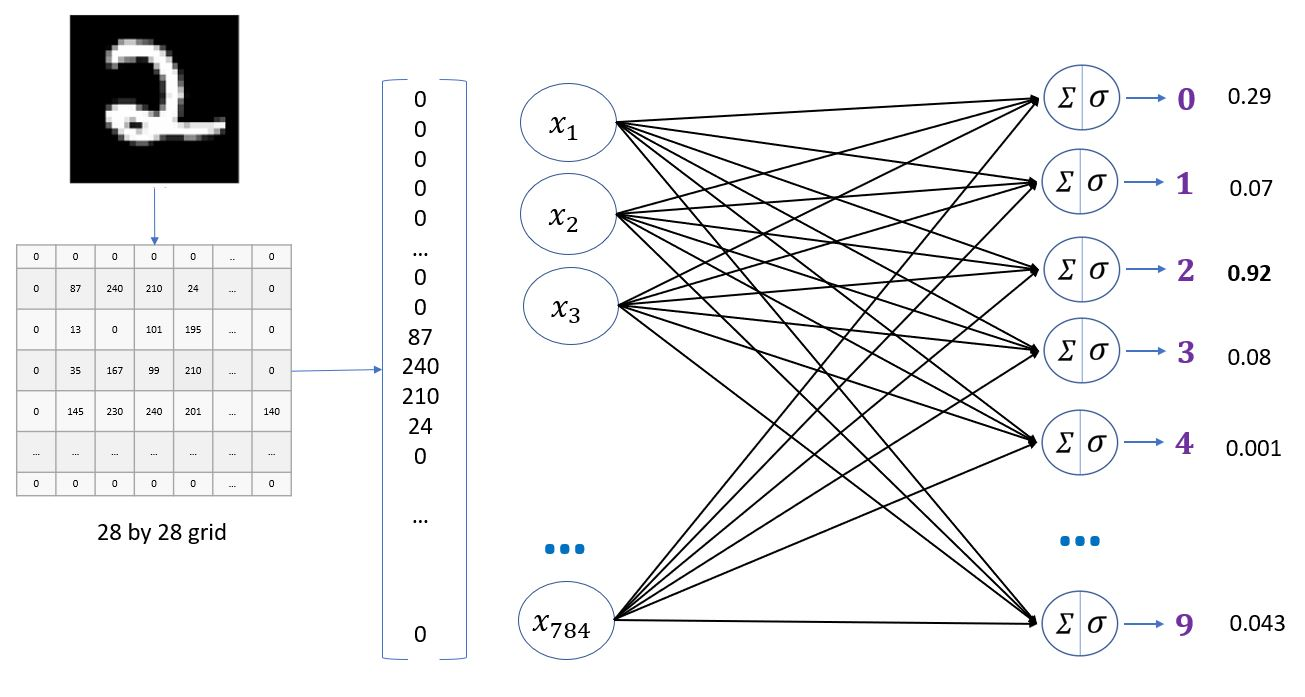

In [39]:
np.argmax(a[1])# This will find the maximum value and return the index of that value

2

In [40]:
y_predicted = [np.argmax(i) for i in a]
y_predicted[:5]

[7, 2, 1, 0, 4]

In [41]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    2,    0,    5,   10,    3,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,   10,  918,   20,    8,    5,   13,   12,   39,    3],
       [   1,    0,   15,  937,    0,   12,    3,   11,   22,    9],
       [   1,    1,    2,    1,  917,    0,   12,    4,   10,   34],
       [   8,    3,    2,   43,   11,  758,   17,    9,   34,    7],
       [   7,    3,    6,    1,    8,    9,  920,    2,    2,    0],
       [   1,    5,   20,    6,    8,    0,    0,  957,    3,   28],
       [   4,    7,    7,   24,    9,   21,   10,   13,  870,    9],
       [   9,    7,    1,   10,   27,    6,    0,   26,    5,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

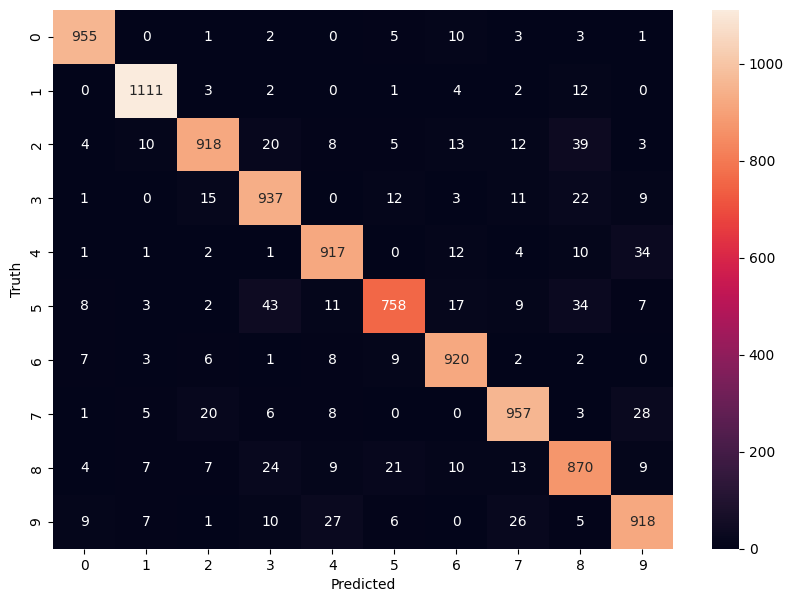

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

let's take a example where from right side 2nd column 3rd row the value 44 indcates that where the actually value is 2 which is represented at the right side but the model predicated as 8 which is represented at the down as 44 times

# USING HIDDEN LAYER
So now lets add some Hidden neuron to imrove the model predication and accuracy

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8754 - loss: 0.4374
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9633 - loss: 0.1258
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9742 - loss: 0.0880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0495


The line of code
```pyhton
keras.layers.Dense(100, input_shape=(784,), activation='relu'),
```
is defining a Dense (fully connected) layer in a neural network using Keras. Let’s break it down in simple terms:

1. Dense Layer
* A Dense layer means every neuron in this layer is connected to every neuron in the previous layer.
* This is used to learn complex relationships in the data.

2. Parameters Explained
`100`
* This is the number of neurons in the layer.
* Each neuron learns a specific feature or pattern from the data.

`input_shape=(784,)`
* This specifies the shape of the input data to the model.
* `(784,)` means the input is a one-dimensional vector with 784 features (e.g., a flattened 28x28 image like in MNIST).
* This is required only for the first layer of the model.

`activation='relu'`
* The activation function determines how the output of a neuron is calculated.
* `'relu'` stands for Rectified Linear Unit, which is defined as:
f(x)=max(0,x)

* If the value is negative, it becomes 0.
* Positive values remain unchanged.

# Why use ReLU?
* It helps the model learn faster and avoids problems like vanishing gradients.

# What Does This Layer Do?
* Takes an input of size 784 (e.g., flattened 28x28 image pixels).
* Passes the input through 100 neurons, each applying a linear transformation and the ReLU activation.
* Produces an output of size 100.


# Example:
Let’s say the input is a vector:
```python
input = [0.2, -0.5, 1.3, ..., 0.8]  # size: 784
```
1. Each neuron in the Dense layer calculates:

output=ReLU(input⋅weights+bias)

Where:

* Weights are the parameters learned during training.
* Bias is an extra parameter added for flexibility.
* ReLU ensures all negative results become 0.

2. After processing through 100 neurons, the output will be:

```python
output = [2.1, 0, 1.7, ..., 0]  # size: 100
```
The final layer output would be probabilities for each digit:

```python
[0.05, 0.1, 0.02, 0.7, 0.03, 0.05, 0.01, 0.02, 0.01, 0.01]  # size: 10
```
(Here, the model predicts digit 3 as the most likely class.)

# Conclusion
The output of the hidden layer is not the final prediction but an intermediate representation of the data. The final output, produced by the last layer, is the actual prediction for digits 0 to 9.


# Hidden Layer Output
* The Dense layer in your example (with 100 neurons and relu activation) is a hidden layer.
* Its output is the transformed data (features) after applying weights, biases, and the activation function (ReLU in this case).
* This output is not the final prediction but an intermediate step in the model. It represents the learned features or patterns.

# Final Output
* The final layer of the model determines the actual prediction.
* In a classification task like MNIST (digits 0 to 9):
* The final layer typically has 10 neurons (one for each digit).
* It uses an activation function like softmax to output probabilities for each class (digit).
* The neuron with the highest probability is chosen as the predicted class.

# Example of a final layer:

```python
keras.layers.Dense(10, activation='softmax')  # Final output layer
```
* 10 neurons correspond to the 10 possible digits (0 to 9).
* The output values are probabilities that sum to 1, indicating the likelihood of each digit.

So nown lets check what is the accuracy and confussion matrix after adding Hidden layer

In [47]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9709 - loss: 0.0994


[0.08745237439870834, 0.973800003528595]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

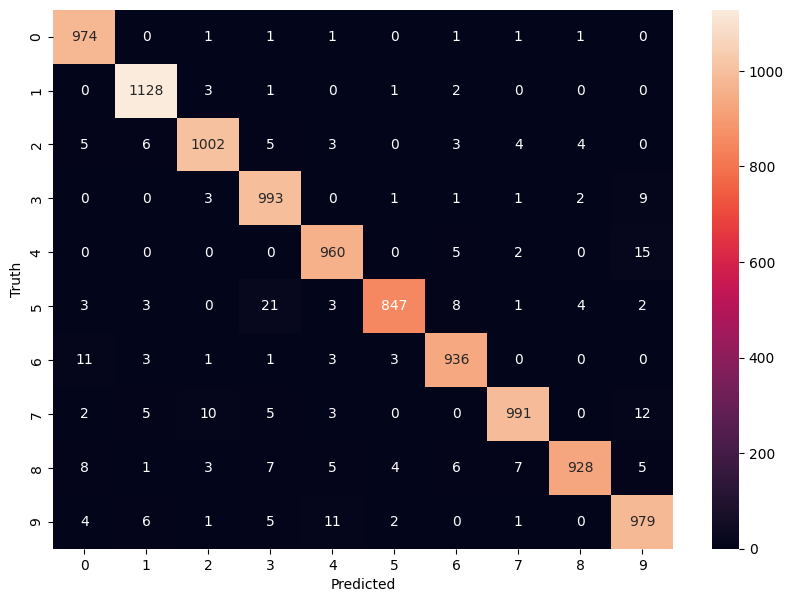

In [48]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Where we can use Flatten using keras only

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7329 - loss: 1.0337
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8994 - loss: 0.3595
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9155 - loss: 0.2976
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9249 - loss: 0.2654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9317 - loss: 0.2422
